In [1]:
!pip install -q git+https://github.com/huggingface/peft.git transformers bitsandbytes datasets

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 MB 27.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 29.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 70.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the foll

In [2]:
pip install pycocoevalcap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.3/104.3 MB 17.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
import torch
from tqdm import tqdm
from torch.utils.data import DataLoader
from pycocoevalcap.eval import COCOEvalCap
from pycocoevalcap.tokenizer.ptbtokenizer import PTBTokenizer
from pycocoevalcap.bleu.bleu import Bleu
from pycocoevalcap.meteor.meteor import Meteor
from pycocoevalcap.rouge.rouge import Rouge
from pycocoevalcap.cider.cider import Cider

In [4]:
from datasets import load_dataset 

test_df = load_dataset("arampacha/rsicd", split="test")

dataset_infos.json: 0.00B [00:00, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/419M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/55.1M [00:00<?, ?B/s]

valid-00000-of-00001.parquet:   0%|          | 0.00/51.6M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/8734 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1093 [00:00<?, ? examples/s]

Generating valid split:   0%|          | 0/1094 [00:00<?, ? examples/s]

In [5]:
test_df

Dataset({
    features: ['filename', 'captions', 'image'],
    num_rows: 1093
})

In [6]:
from transformers import Blip2ForConditionalGeneration, AutoProcessor
from peft import PeftModel, PeftConfig

peft_model_id = "dhairya-1105/blip2-opt-2.7b-rsicd-dataset-pruned-llm-and-qformer"
config = PeftConfig.from_pretrained(peft_model_id)

model = Blip2ForConditionalGeneration.from_pretrained(config.base_model_name_or_path, torch_dtype=torch.float16, device_map="auto")
model = PeftModel.from_pretrained(model, peft_model_id)

processor = AutoProcessor.from_pretrained("Salesforce/blip2-opt-2.7b")

2025-06-26 10:01:25.326022: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750932085.518467      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750932085.582352      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


adapter_config.json:   0%|          | 0.00/934 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin.index.json: 0.00B [00:00, ?B/s]

Fetching 8 files:   0%|          | 0/8 [00:00<?, ?it/s]

pytorch_model-00003-of-00008.bin:   0%|          | 0.00/985M [00:00<?, ?B/s]

pytorch_model-00008-of-00008.bin:   0%|          | 0.00/782M [00:00<?, ?B/s]

pytorch_model-00006-of-00008.bin:   0%|          | 0.00/997M [00:00<?, ?B/s]

pytorch_model-00007-of-00008.bin:   0%|          | 0.00/997M [00:00<?, ?B/s]

pytorch_model-00004-of-00008.bin:   0%|          | 0.00/997M [00:00<?, ?B/s]

pytorch_model-00001-of-00008.bin:   0%|          | 0.00/995M [00:00<?, ?B/s]

pytorch_model-00002-of-00008.bin:   0%|          | 0.00/999M [00:00<?, ?B/s]

pytorch_model-00005-of-00008.bin:   0%|          | 0.00/997M [00:00<?, ?B/s]

model.safetensors.index.json: 0.00B [00:00, ?B/s]

Loading checkpoint shards:   0%|          | 0/8 [00:00<?, ?it/s]

adapter_model.safetensors:   0%|          | 0.00/20.9M [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/peft/peft_model.py:585: UserWarning: Found missing adapter keys while loading the checkpoint: ['base_model.model.qformer.encoder.layer.8.attention.attention.query.lora_A.default.weight', 'base_model.model.qformer.encoder.layer.8.attention.attention.query.lora_B.default.weight', 'base_model.model.qformer.encoder.layer.8.attention.attention.key.lora_A.default.weight', 'base_model.model.qformer.encoder.layer.8.attention.attention.key.lora_B.default.weight', 'base_model.model.qformer.encoder.layer.8.crossattention.attention.query.lora_A.default.weight', 'base_model.model.qformer.encoder.layer.8.crossattention.attention.query.lora_B.default.weight', 'base_model.model.qformer.encoder.layer.8.crossattention.attention.key.lora_A.default.weight', 'base_model.model.qformer.encoder.layer.8.crossattention.attention.key.lora_B.default.weight', 'base_model.model.qformer.encoder.layer.9.attention.attention.query.lora_A.default.weight', 'base_model.model.qformer

processor_config.json:   0%|          | 0.00/68.0 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


preprocessor_config.json:   0%|          | 0.00/432 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/882 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

added_tokens.json:   0%|          | 0.00/23.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/548 [00:00<?, ?B/s]

In [7]:
model.device

device(type='cuda', index=0)

The `language_model` is not in the `hf_device_map` dictionary and you are running your script in a multi-GPU environment. this may lead to unexpected behavior when using `accelerate`. Please pass a `device_map` that contains `language_model` to remove this warning. Please refer to https://github.com/huggingface/blog/blob/main/accelerate-large-models.md for more details on creating a `device_map` for large models.
Expanding inputs for image tokens in BLIP-2 should be done in processing. Please follow instruction here (https://gist.github.com/zucchini-nlp/e9f20b054fa322f84ac9311d9ab67042) to update your BLIP-2 model. Using processors without these attributes in the config is deprecated and will throw an error in v4.50.
/usr/local/lib/python3.11/dist-packages/transformers/generation/configuration_utils.py:679: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `ear

Generated Caption: a road is in the middle of a forest
Reference Captions: ['the yellow path crosses the dense forest.', 'an road crosses the forest  winding and twisting .', 'the yellow trail is across the dense forest .', 'a curved dirt road passes through this lush forest .', 'a river is in a piece of green forest .']


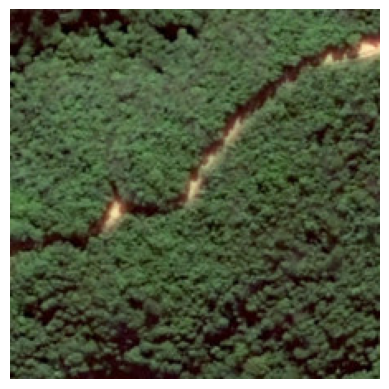

In [8]:
import matplotlib.pyplot as plt

def generate_caption(index, test_df, model, processor, num_beams=1, max_length=50, length_penalty=1.5):
    import torch
    model.eval()
    device = next(model.parameters()).device

    example = test_df[index]
    image = example["image"]
    plt.axis('off')
    plt.imshow(image)
    inputs = processor(images=image, return_tensors="pt").to(device)

    with torch.no_grad():
        generated_ids = model.generate(
            pixel_values=inputs["pixel_values"],
            max_length=max_length,
            num_beams=num_beams,
            length_penalty=length_penalty,
            early_stopping=True,
            repetition_penalty=1.5,      # Penalizes repeated phrases/tokens
            # temperature=1,  
        )
    
    caption = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
    return caption.strip()

idx = 402 # Index of the image in test_df
caption = generate_caption(idx, test_df, model, processor)
print(f"Generated Caption: {caption}")
print(f"Reference Captions: {test_df[idx]['captions']}")

In [9]:
print(type(model))

<class 'peft.peft_model.PeftModel'>


In [10]:
merged_model = model.merge_and_unload()
merged_model = merged_model.half()
# model.save_pretrained("blip2-lora-merged")
print(type(merged_model))

<class 'transformers.models.blip_2.modeling_blip_2.Blip2ForConditionalGeneration'>


In [11]:
def get_model_size_in_memory(model):
    total_params = sum(p.numel() for p in model.parameters())
    size_in_bytes = total_params * 2  # 2 bytes for float16
    return size_in_bytes / (1024 * 1024)

print(f"In-memory model size: {get_model_size_in_memory(merged_model)/1024:.2f} GB")
print(f"Original model size: {get_model_size_in_memory(merged_model)*2/1024:.2f} GB")

In-memory model size: 6.98 GB
Original model size: 13.95 GB


In [12]:
from torch.utils.data import Dataset, DataLoader

class ImageCaptioningDataset(Dataset):
    def __init__(self, dataset, processor):
        self.dataset = dataset
        self.processor = processor

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        item = self.dataset[idx]
        encoding = self.processor(images=item["image"], padding="max_length", return_tensors="pt")
        # remove batch dimension
        encoding = {k: v.squeeze() for k, v in encoding.items()}
        encoding["captions"] = item["captions"]
        return encoding

def collate_fn(batch):
    # pad the input_ids and attention_mask
    processed_batch = {}
    for key in batch[0].keys():
        if key != "captions":
            processed_batch[key] = torch.stack([example[key] for example in batch])
        else:
            text_inputs = processor.tokenizer(
                [example["captions"] for example in batch], padding=True, return_tensors="pt"
            )
            processed_batch["input_ids"] = text_inputs["input_ids"]
            processed_batch["attention_mask"] = text_inputs["attention_mask"]
    return processed_batch


In [13]:
# Prepare the dataloader
test_dataset = ImageCaptioningDataset(test_df, processor)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

In [14]:
references = []
predictions = []

for example in test_df:
    refs = [cap.lower().strip() for cap in example["captions"]]  # list of 5 refs per image
    # Generate caption
    inputs = processor(images=example["image"], return_tensors="pt").to(merged_model.device)
    generated_ids = merged_model.generate(
            pixel_values=inputs["pixel_values"],
            max_length=50,
            num_beams=5,
            # length_penalty=1.5,
            # early_stopping=True
    )

    pred_caption = processor.batch_decode(generated_ids, skip_special_tokens=True)[0].lower().strip()
    
    references.append(refs)
    predictions.append(pred_caption)

The `language_model` is not in the `hf_device_map` dictionary and you are running your script in a multi-GPU environment. this may lead to unexpected behavior when using `accelerate`. Please pass a `device_map` that contains `language_model` to remove this warning. Please refer to https://github.com/huggingface/blog/blob/main/accelerate-large-models.md for more details on creating a `device_map` for large models.
The `language_model` is not in the `hf_device_map` dictionary and you are running your script in a multi-GPU environment. this may lead to unexpected behavior when using `accelerate`. Please pass a `device_map` that contains `language_model` to remove this warning. Please refer to https://github.com/huggingface/blog/blob/main/accelerate-large-models.md for more details on creating a `device_map` for large models.
The `language_model` is not in the `hf_device_map` dictionary and you are running your script in a multi-GPU environment. this may lead to unexpected behavior when us

In [15]:
from pycocoevalcap.bleu.bleu import Bleu
from pycocoevalcap.meteor.meteor import Meteor
from pycocoevalcap.rouge.rouge import Rouge
from pycocoevalcap.cider.cider import Cider

refs_dict = {str(i): refs for i, refs in enumerate(references)}       # refs is list of captions
preds_dict = {str(i): [pred] for i, pred in enumerate(predictions)}   # pred wrapped in a list

bleu_scorer = Bleu()
meteor_scorer = Meteor()
rouge_scorer = Rouge()
cider_scorer = Cider()

bleu_score, _ = bleu_scorer.compute_score(refs_dict, preds_dict)
meteor_score, _ = meteor_scorer.compute_score(refs_dict, preds_dict)
rouge_score, _ = rouge_scorer.compute_score(refs_dict, preds_dict)
cider_score, _ = cider_scorer.compute_score(refs_dict, preds_dict)

print("BLEU-1 to BLEU-4:", bleu_score)
print("METEOR:", meteor_score)
print("ROUGE:", rouge_score)
print("CIDEr:", cider_score)

{'testlen': 11946, 'reflen': 11902, 'guess': [11946, 10853, 9760, 8667], 'correct': [6204, 1943, 626, 216]}
ratio: 1.0036968576708953
BLEU-1 to BLEU-4: [0.5193370165745421, 0.30492015942129747, 0.1813422210611444, 0.1104130575796067]
METEOR: 0.18649212748978647
ROUGE: 0.3210000329832528
CIDEr: 0.3711650119512547


In [16]:
def count_all_parameters(model):
    return sum(p.numel() for p in model.parameters())

print(f"Total parameters: {count_all_parameters(merged_model):,}")

Total parameters: 3,744,679,936


In [17]:
print(f"Total parameters: {count_all_parameters(model):,}")

Total parameters: 3,744,679,936


In [18]:
print(f"Q-Former layers before pruning: {len(model.qformer.encoder.layer)}")

Q-Former layers before pruning: 12


In [19]:
from torch.profiler import profile, record_function, ProfilerActivity

sample = test_df[0]
inputs = processor(images=[sample["image"]], return_tensors="pt").to(merged_model.device)
# Optional warm-up
with torch.no_grad(), torch.amp.autocast('cuda', dtype=torch.float16):
    for _ in range(2):
        _ = merged_model.generate(pixel_values=inputs["pixel_values"], max_length=20)

# Profile
with profile(
    activities=[ProfilerActivity.CPU, ProfilerActivity.CUDA],
    with_stack=True,
    record_shapes=True,
    profile_memory=True,
    with_flops=True
) as prof:
    with torch.no_grad():
        with record_function("blip2_caption_generation"):
            _ = merged_model.generate(pixel_values=inputs["pixel_values"], max_length=20)

# Print total FLOPs
flops = prof.key_averages().total_average().flops
print(f"Total GFLOPs (image to caption): {flops / 1e9:.2f}")

The `language_model` is not in the `hf_device_map` dictionary and you are running your script in a multi-GPU environment. this may lead to unexpected behavior when using `accelerate`. Please pass a `device_map` that contains `language_model` to remove this warning. Please refer to https://github.com/huggingface/blog/blob/main/accelerate-large-models.md for more details on creating a `device_map` for large models.
The `language_model` is not in the `hf_device_map` dictionary and you are running your script in a multi-GPU environment. this may lead to unexpected behavior when using `accelerate`. Please pass a `device_map` that contains `language_model` to remove this warning. Please refer to https://github.com/huggingface/blog/blob/main/accelerate-large-models.md for more details on creating a `device_map` for large models.
The `language_model` is not in the `hf_device_map` dictionary and you are running your script in a multi-GPU environment. this may lead to unexpected behavior when us

Total GFLOPs (image to caption): 771.75


In [20]:
sample = test_df[0]
inputs = processor(images=[sample["image"]], return_tensors="pt").to(merged_model.device)

In [21]:
import time

# Warm-up
with torch.no_grad(), torch.amp.autocast('cuda', dtype=torch.float16):
    for _ in range(3):
        _ = merged_model.generate(pixel_values=inputs["pixel_values"], max_length=50)

# Time
n_runs = 10
total_time = 0

with torch.no_grad(), torch.amp.autocast('cuda', dtype=torch.float16):
    for _ in range(n_runs):
        start = time.time()
        _ = generated_ids = merged_model.generate(
            pixel_values=inputs["pixel_values"],
            max_length=50,
            length_penalty=10,          # Encourages longer captions
            repetition_penalty=1.2,      # Penalizes repeated phrases/tokens
            temperature=0.3,             # Controls randomness; lower = more deterministic
            early_stopping=True,         # Stops generation early when all beams are done
            num_beams=1                  # Greedy decoding
        )
        torch.cuda.synchronize()
        total_time += time.time() - start

avg_time = total_time / n_runs
print(f"Avg time per image: {avg_time:.3f} sec")

The `language_model` is not in the `hf_device_map` dictionary and you are running your script in a multi-GPU environment. this may lead to unexpected behavior when using `accelerate`. Please pass a `device_map` that contains `language_model` to remove this warning. Please refer to https://github.com/huggingface/blog/blob/main/accelerate-large-models.md for more details on creating a `device_map` for large models.
The `language_model` is not in the `hf_device_map` dictionary and you are running your script in a multi-GPU environment. this may lead to unexpected behavior when using `accelerate`. Please pass a `device_map` that contains `language_model` to remove this warning. Please refer to https://github.com/huggingface/blog/blob/main/accelerate-large-models.md for more details on creating a `device_map` for large models.
The `language_model` is not in the `hf_device_map` dictionary and you are running your script in a multi-GPU environment. this may lead to unexpected behavior when us

Avg time per image: 0.668 sec
